In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle

## 5.2 Data preparation

In [2]:
from sklearn import datasets

data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
data_breast_cancer.data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='x', ylabel='y'>

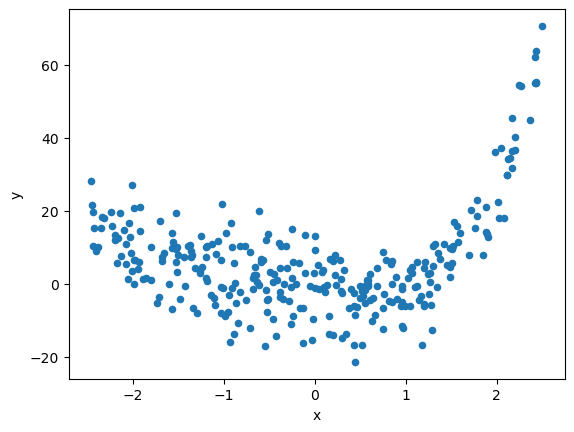

In [3]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4

df = pd.DataFrame({'x':X, 'y':y})
df.plot.scatter(x='x', y='y')

## 5.3 Classification

depth: 1, f1_train: 0.7539062500000001, f1_test: 0.6949152542372881
depth: 2, f1_train: 0.8211243611584327, f1_test: 0.7887323943661971
depth: 3, f1_train: 0.8211243611584327, f1_test: 0.7887323943661971
depth: 4, f1_train: 0.8464163822525598, f1_test: 0.7647058823529411
depth: 5, f1_train: 0.8710217755443886, f1_test: 0.7397260273972602
depth: 6, f1_train: 0.8965517241379309, f1_test: 0.7310344827586208
depth: 7, f1_train: 0.9215017064846417, f1_test: 0.7172413793103449
depth: 8, f1_train: 0.9413793103448277, f1_test: 0.7246376811594204
depth: 9, f1_train: 0.9598603839441536, f1_test: 0.6962962962962963

best result at depth: 2 [2, 0.8211243611584327, 0.7887323943661971, 0.7692307692307693, 0.7368421052631579]


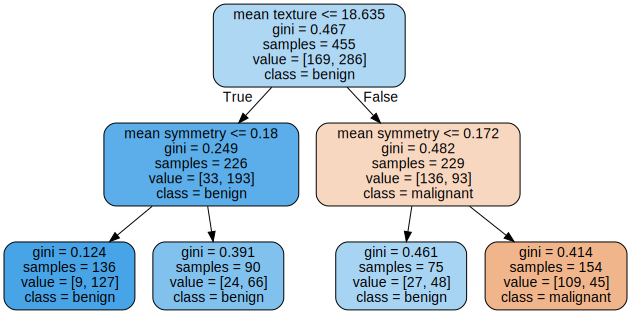

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
import graphviz

X_train, X_test, y_train, y_test = train_test_split(
    data_breast_cancer['data'][['mean texture', 'mean symmetry']],
    data_breast_cancer['target'].astype(np.uint8), 
    test_size=0.2,
    random_state=42
)

results = []
for depth in range(1, 10):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)

    y_pred_train = tree_clf.predict(X_train)
    y_pred_test = tree_clf.predict(X_test)
    
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    
    results.append([depth, f1_train, f1_test, acc_train, acc_test])
    print(f"depth: {depth}, f1_train: {f1_train}, f1_test: {f1_test}")

best_result = max(results, key=lambda x: x[2])
best_depth = best_result[0]
print(f"\nbest result at depth: {best_depth} {best_result}")

with open('f1acc_tree.pkl', 'wb') as f:
    pickle.dump(best_result, f)

clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf.fit(X_train, y_train)

dot_data = export_graphviz(
    clf, 
    out_file=None, 
    feature_names=['mean texture', 'mean symmetry'], 
    class_names=['malignant', 'benign'], 
    rounded=True, 
    filled=True
)

graph = graphviz.Source(dot_data)  

with open('bc.png', 'wb') as f:
    f.write(graph.pipe(format='png'))

graph

## 5.4 Regression

[4, 46.35073583910204, 64.39234875431738]


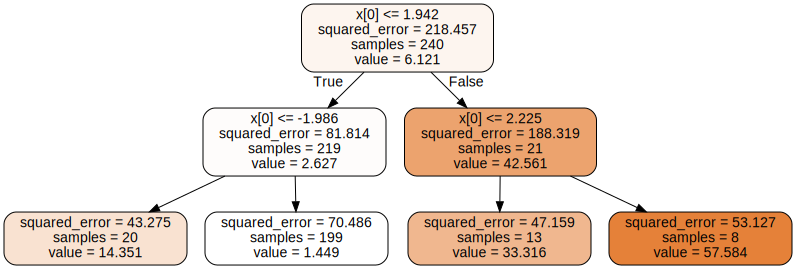

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

results=[]
for depth in range(1, 10):
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train, y_train)
    
    train_pred = tree_reg.predict(X_train)
    test_pred = tree_reg.predict(X_test)
    
    mse_train = mean_squared_error(y_train, train_pred)
    mse_test = mean_squared_error(y_test, test_pred)
    
    results.append([depth, mse_train, mse_test])

best_result = min(results, key=lambda x: x[2])
print(best_result)

with open('mse_tree.pkl', 'wb') as f:
    pickle.dump(best_result, f)

reg = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
reg.fit(X_train, y_train)

dot_data = export_graphviz(
    reg, 
    out_file=None,
    rounded=True, 
    filled=True
)

graph = graphviz.Source(dot_data)  

with open('reg.png', 'wb') as f:
    f.write(graph.pipe(format='png'))

graph

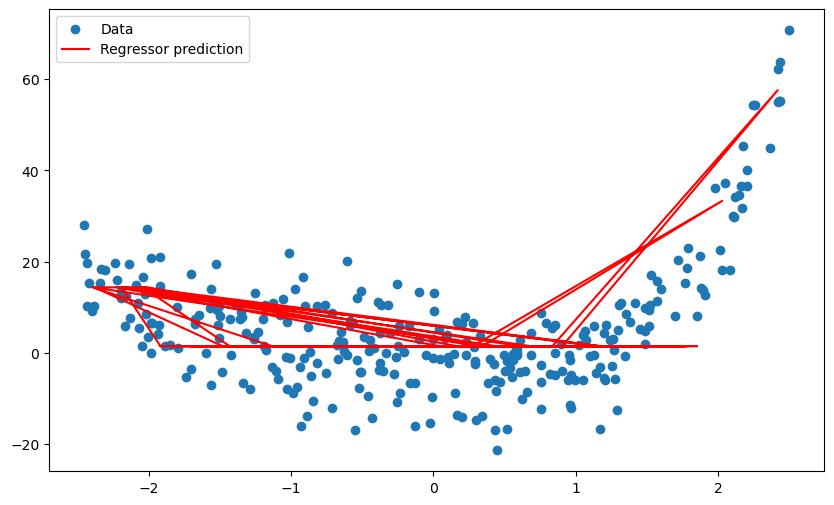

In [6]:
y_pred = reg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], label='Data')
plt.plot(X_test, y_pred, color='red', label='Regressor prediction')

plt.legend()
plt.show()